# [CoE202] note 02b. Linear regression with closed form solution (1-D)

- Class Date : 2021.03.11.
- Office Hour : -----------
- If you have any questions, upload on KLMS Q&A board, or ask directly at the TA office hours (Zoom)

## 1. Linear regression 
Given data points (x, y), we want to find linear estimator that fits the data. 

In [1]:
# this is just an annotation
import numpy as np # this is for importing numpy library (and we will use abbreviation np for that)
import matplotlib.pyplot as plt # this is for importing matplotlib.pyplot (library for graph plot)

In [2]:
# data points
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0]) 
y = np.array([0.0, 0.8, 1.9, 3.1, 4.8, 5.1])

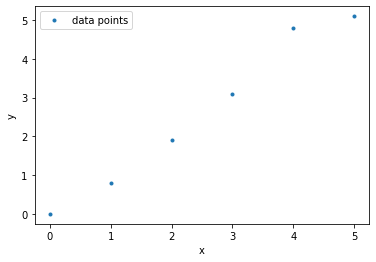

In [3]:
# plot data points
plt.plot(x, y, '.', label = 'data points')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')

## 1-1. Linear regression with closed form solution

We learned how to calculate a, b in y = ax + b when data points are given. Linear regression with closed solution is to find a, b where gradients of loss function (mean squared error) becomes zero.



Let's first define a function that converts our data into the matrix form.

In [4]:
def linear_features(x, K):
    # computes the feature matrix (N x (K+1))        
    X = x.reshape(-1, K)  
    N, D = X.shape    
    X_aug = np.hstack([np.ones((N, 1)), X])  # augmented X of size 6 x (K+1)
    return X_aug

def vectorize_y(y):
    y_vec = y.reshape(-1, 1)  # 6 x 1 vector, N=6
    return y_vec

And then use the function.

In [5]:
# convert our data into matrix form
X_aug = linear_features(x, 1)
y_vec = vectorize_y(y)

print(X_aug)
print(y_vec)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]
[[0. ]
 [0.8]
 [1.9]
 [3.1]
 [4.8]
 [5.1]]


Let's define our own linear fitting function based on the closed form solution.

![](https://drive.google.com/uc?export=view&id=1cBc0sQxsnFcfnaCNxcCrf_ixVe-6Bh_r)


In [6]:
# same function as above
def np_linearfit(X_aug, y):    
    # X: m x 2 matrix of training inputs
    # y: m x 1 vector of training targets/observations
    # returns: coefficients  (2 x 1)
    theta = (np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T) @ y
    return theta

Let's find the coefficients using our own function.

In [7]:
# run fitting
p_coeff = np_linearfit(X_aug, y_vec) # obtain p_coeff by using np_linearfit function

print(p_coeff)

p = np.poly1d([p_coeff[1,0], p_coeff[0,0]]) # convert p_coeff to polynomial instance using np.poly1d function

[[-0.14761905]
 [ 1.10571429]]


And let's plot the results!

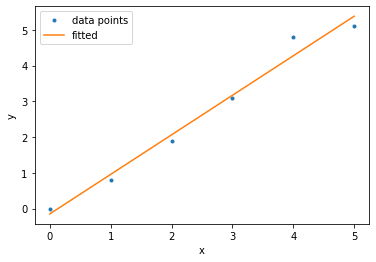

In [8]:
# plot results
xp = np.linspace(0, 5, 100)  # we can think of this as generating test data points
plt.plot(x, y, '.', label = 'data points') # plot data points
plt.plot(xp, p(xp), label = 'fitted')     # plot fitted curve
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')